In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
rent = pd.read_csv('rent-ideal.csv')
rent.head()

,bedrooms,bathrooms,latitude,longitude,price
0,1,1.0,40.7108,-73.9539,2400
1,2,1.0,40.7513,-73.9722,3800
2,2,1.0,40.7575,-73.9625,3495
3,3,1.5,40.7145,-73.9425,3000
4,0,1.0,40.7439,-73.9743,2795


In [57]:
rent_bath = rent.groupby('bathrooms').agg({'price':['mean']}).reset_index()
rent_bath.columns = ['bathrooms', 'avg_price']

In [58]:
rent_bath

,bathrooms,avg_price
0,0.0,3144.870000
1,1.0,3027.007118
2,1.5,4226.336449
3,2.0,5278.595739
4,2.5,6869.047368
5,3.0,6897.974576
6,3.5,7635.357143
7,4.0,7422.888889
8,4.5,2050.000000
9,10.0,3600.000000


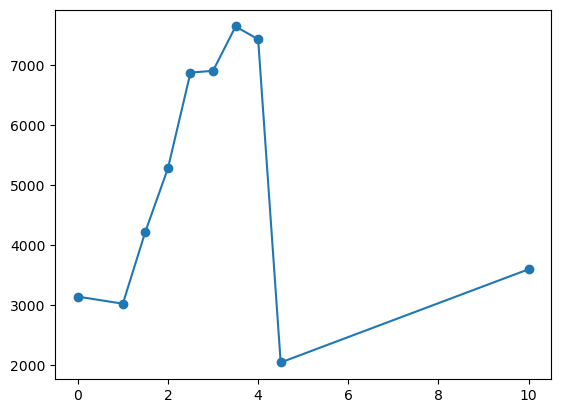

In [59]:
plt.scatter(rent_bath['bathrooms'], rent_bath['avg_price'])
plt.plot(rent_bath['bathrooms'], rent_bath['avg_price'])

In [60]:
X = rent_bath.drop('avg_price', axis = 1)
Y = rent_bath['avg_price']

In [61]:
lr = LinearRegression()
lr.fit(X, Y)

LinearRegression()

In [62]:
print(lr.coef_,lr.intercept_)

[-15.39499021] 5064.471696853053


$$
\hat{Y} = (-1539499021 * baths) + 5064.471696853053
$$

In [63]:
lr.predict(X)

array([5064.47169685, 5049.07670665, 5041.37921155, 5033.68171644,
       5025.98422134, 5018.28672624, 5010.58923113, 5002.89173603,
       4995.19424093, 4910.5217948 ])

In [64]:
w1 = lr.coef_
w0 = lr.intercept_

In [65]:
X['bathrooms'].values

array([ 0. ,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5, 10. ])

In [66]:
preds = w1*X['bathrooms'].values + w0

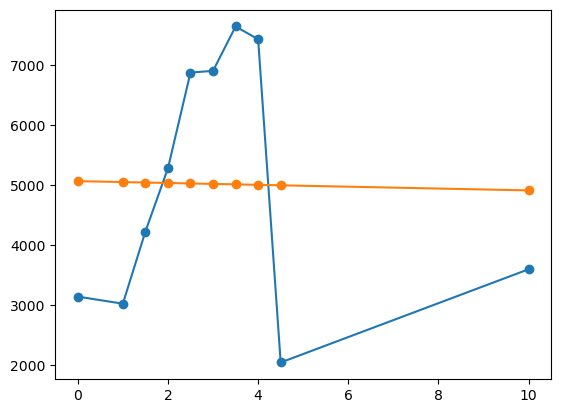

In [67]:
plt.scatter(rent_bath['bathrooms'], rent_bath['avg_price'])
plt.plot(rent_bath['bathrooms'], rent_bath['avg_price'])

plt.scatter(rent_bath['bathrooms'], preds)
plt.plot(rent_bath['bathrooms'], preds)

### Random Forest Classifier

In [46]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from numpy.random import default_rng

In [11]:
bc = load_breast_cancer()

In [17]:
bc

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [19]:
X = bc['data']
y = bc['target']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [37]:
features = ['radius error', 'texture error', 'concave points error', 'symmetry error', 'worst texture', 'worst smoothness', 'worst symmetry']

In [38]:
X = pd.DataFrame(X, columns = bc['feature_names'])

In [39]:
X = X[features]

In [40]:
rf = RandomForestClassifier(oob_score = True)
rf. fit(X.values, y)

RandomForestClassifier(oob_score=True)

In [41]:
rf.oob_score_

0.9314586994727593

### Confusion Matrix

In [45]:
y_pred = rf.predict(X.values)

confusion_matrix(y, y_pred)

array([[212,   0],
       [  0, 357]], dtype=int64)

In [48]:
rng = default_rng(seed = 45)
rng.integers(0, 100, size = (2,2))

array([[92, 57],
       [73, 52]], dtype=int64)

In [50]:
# Accuracy = (TP + TN) / (TP + FP + FN + TN)
acc = ((92+52)/(92+57+73+52))
acc

0.5255474452554745

In [59]:
# Precision = TP / (TP + FP)
precision = 92 / (92 + 57)
precision

0.6174496644295302

In [60]:
# Recall = TP / (TP + FN)
recall = 92 / (92+ 73)
recall

0.5575757575757576

In [64]:
# F1 Score = 2(precision * recall) / (precision + recall)
f1_score = 2*(precision * recall) / (precision + recall)
f1_score

0.5859872611464969